In [14]:
# Importing necessary packages
import spacy
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
nlp = spacy.load('en_core_web_sm')
import random
import copy

import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader, random_split

import gc

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [16]:
trainPath = "./Data/Ass5/ArithOpsTrain.xlsx"
trainData_df = pd.read_excel(trainPath)

# Deleting first column
trainData_df.drop(columns = trainData_df.columns[0], axis = 1, inplace= True)

# Changing column name
col_list = []
for i in range(trainData_df.shape[1]):
  col_list.append(trainData_df.iloc[0, i])
  
trainData_df.columns = col_list 

# Deleting first row
trainData_df = trainData_df.iloc[1:, :]
print(trainData_df)

                                           Description  \
1    gino has number0 popsicle sticks . i have numb...   
2    lino picked up number0 shells at the seashore ...   
3    there were number0 parents in the program and ...   
4    last saturday marie sold number0 magazines and...   
5    there are number0 birds on the fence . number1...   
..                                                 ...   
975  there are number0 bananas in janice 's banana ...   
976  janice has number0 bottle caps that must be pu...   
977  chris is inviting number0 friends to a party ....   
978  keith has number0 marbles and number1 pencils ...   
979  there are number0 students and number1 apples ...   

                                              Question           Equation  \
1             what is the sum of our popsicle sticks ?  + number0 number1   
2              how many shells did he pick up in all ?  + number0 number1   
3        how many people were present in the program ?  + number0 number

In [17]:
descriptions = np.array(trainData_df.loc[:, "Description"].to_list())
questions = np.array(trainData_df.loc[:, "Question"].to_list())
equation = np.array(trainData_df.loc[:, "Equation"].to_list())
inputNumbers = np.array(trainData_df.loc[:, "Input Numbers"].to_list())
output = np.array(trainData_df.loc[:, "Output"].to_list())

# FAKE

{'+': 399, '-': 453, '*': 174, '/': 178}
+ 33.13953488372093
- 37.62458471760797
* 14.451827242524917
/ 14.784053156146179


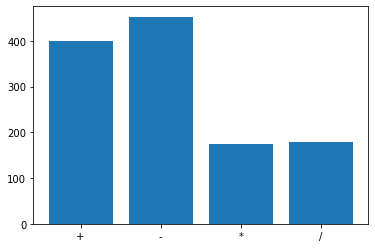

In [18]:
opDict = {'+':0, '-':0, '*':0, '/':0}
nOps = 0
for i in equation:
  for j in i.split():
    if j in opDict:
      nOps += 1
      opDict[j] += 1
print(opDict)
for i in opDict:
  print(i, opDict[i]/nOps * 100)
names = list(opDict.keys())
values = list(opDict.values())
plt.bar(range(len(opDict)), values, tick_label=names)
plt.show()

In [19]:
def get_op():
  temp = random.random()
  if(temp < 0.3313):
    return '+'
  if(temp < 0.7075):
    return '-'
  if(temp < 0.8521):
    return '*'
  else:
    return '/'

In [20]:
def is_operand(c):
  if c in opDict:
    return False
  return True
  
def evaluate(expression):
    stack = []
    for c in expression[::-1]:
        if is_operand(c):
            stack.append(int(float(c)))
 
        else:
            o1 = stack.pop()
            o2 = stack.pop()
            if c == '+':
                stack.append(o1 + o2)
 
            elif c == '-':
                stack.append(o1 - o2)
 
            elif c == '*':
                stack.append(o1 * o2)
 
            elif c == '/':
                stack.append(o1 / o2)
    return stack.pop()

In [21]:
def numbers_to_prefix(number):
  tempNum = copy.copy(number)
  random.shuffle(tempNum)
  if(len(tempNum) == 2):
    tempNum.insert(0, get_op())
    return tempNum
  
  else:
    tempNum.insert(0, get_op())
    if(random.random()<0.5):
      return tempNum[:3]
    tempNum.insert(random.randint(0, 2), get_op())
    return tempNum[:5]
  
def prefix_to_output(prefixExp):
  return evaluate(prefixExp)

In [22]:
c = 0
for i,numbers in enumerate(inputNumbers):
  prefixExp = numbers_to_prefix(numbers.split())
  res = prefix_to_output(prefixExp)
  if(res == output[i]):
    c+=1
print("Accuracy = ", c/len(inputNumbers) * 100)

Accuracy =  15.321756894790603


In [23]:
testPath = "./Data/Ass5/ArithOpsTestData1.xlsx"
testData_df = pd.read_excel(testPath)

print(testData_df)

                                           Description  \
0    number0 red apples and number1 green apples ar...   
1    ellen has number0 more balls than marin . mari...   
2    janet has number0 oranges and sharon has numbe...   
3    allan brought number0 balloons and jake brough...   
4    adam has number0 more apples than jackie . jac...   
..                                                 ...   
233  kaleb bought number0 boxes of chocolate candy ...   
234  a trivia team had number0 members total but du...   
235  the school is planning a field trip . there ar...   
236  dennis has number0 pencils stored in boxes . i...   
237  there are number0 skittles in steven 's skittl...   

                                              Question Input Numbers  
0                  how many apples are in the basket ?           7 2  
1                     how many balls does ellen have ?           6 9  
2    how many oranges do janet and sharon have toge...           9 7  
3    how many ballo

In [24]:
descriptionsTest = np.array(testData_df.loc[:, "Description"].to_list())
questionsTest = np.array(testData_df.loc[:, "Question"].to_list())
inputNumbersTest = np.array(testData_df.loc[:, "Input Numbers"].to_list())

In [25]:
for i,numbers in enumerate(inputNumbersTest):
  prefixExp = numbers_to_prefix(numbers.split())
  res = prefix_to_output(prefixExp)
  print(res)

-5
15
16
2.0
45
11
8
0.8095238095238095
18
11
2.090909090909091
9
45
48
8
7
-3
-7
12
6
3.5
4
4
5
-1
-1
1
-34
-12
13
-12
1.5
23
12
-6
4
24
11
0.75
18
-7
11
13
-5
28
0.4666666666666667
-4
929
62
504
7
696
-31
0.44
162
42
0.17857142857142858
45
32
0.26666666666666666
-42
-35
35.56122448979592
4725
57
8568
61
2
300
250
-18
11
4
2
1
8
0.017565359477124183
-2
803
31500
442
164
512
603
231
98
1.06
-217
0.3076923076923077
55
0.7725
678
7
8
4
1.6
-3
56
12
-7
11
72
-356
88
110
800
90
-413
-25
4.0
147
48
54
48
11
284
165
1
-3.0
2205
45
121
18
0.5111111111111111
2442
267
-23.857142857142858
228
424
22
68250
14
44
29
8
41.0
44
8
10
-37
1170
9
-48
58
166
0.5555555555555556
102
-2
126
8448
0
3822
11760
86
0.15384615384615385
23
0.2857142857142857
31
-67
12
49
102
204
-616
198
-329
220
10
22
-5
49
20
7
-5
20
16
-1
-56
-4
1.8
-2
1
48
7
55
1.125
10
11
62
5.0
-8
6
-5
15
14
8
23
17
12
18
5
0.3125
109
98
-7
9603
-13
0.6071428571428571
100
11
-12
30
22
-33.6875
-175
-3
13
-2
39
-3
900
0.5
0.5
10
4.090909090